Epoch 1/11
352/352 [==============================] - 20s 55ms/step - loss: 1.7127 - accuracy: 0.3717 - val_loss: 1.4021 - val_accuracy: 0.4974
Epoch 2/11
352/352 [==============================] - 19s 53ms/step - loss: 1.3497 - accuracy: 0.5144 - val_loss: 1.2340 - val_accuracy: 0.5588
Epoch 3/11
352/352 [==============================] - 18s 51ms/step - loss: 1.1915 - accuracy: 0.5778 - val_loss: 1.0618 - val_accuracy: 0.6314
Epoch 4/11
352/352 [==============================] - 19s 54ms/step - loss: 1.0889 - accuracy: 0.6161 - val_loss: 1.0027 - val_accuracy: 0.6502
Epoch 5/11
352/352 [==============================] - 19s 55ms/step - loss: 0.9968 - accuracy: 0.6491 - val_loss: 0.9524 - val_accuracy: 0.6706
Epoch 6/11
352/352 [==============================] - 20s 57ms/step - loss: 0.9326 - accuracy: 0.6728 - val_loss: 0.9000 - val_accuracy: 0.6850
Epoch 7/11
352/352 [==============================] - 19s 53ms/step - loss: 0.8769 - accuracy: 0.6930 - val_loss: 0.8883 - val_accuracy:

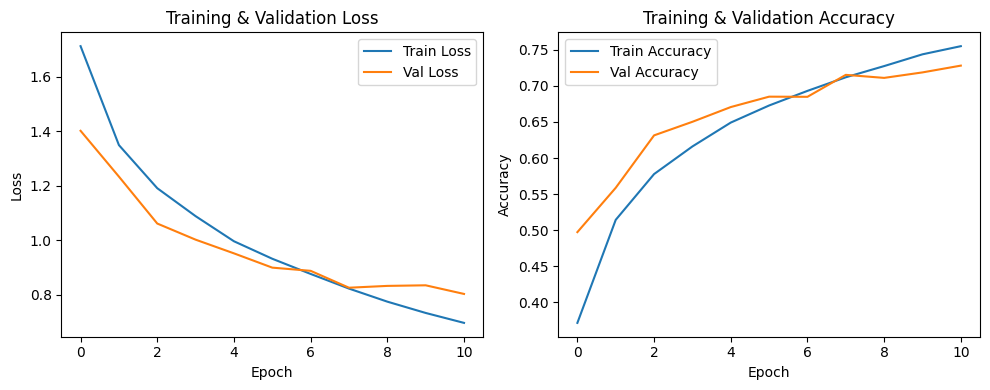

In [1]:
# ============================================================
# CNN Model for CIFAR-10 Classification (LP-IV Problem 3)
# ============================================================

# a. Loading and preprocessing the image data
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load train and test data
train = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

# Separate features and labels
X_train = train.drop('label', axis=1).values
y_train = train['label'].values
X_test = test.drop('label', axis=1).values
y_test = test['label'].values

# Normalize and reshape to 32x32x3 (CIFAR-10 images)
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

# ------------------------------------------------------------
# b. Defining the model's architecture
# ------------------------------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# ------------------------------------------------------------
# c. Training the model
# ------------------------------------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=11, batch_size=128,
                    validation_split=0.1, verbose=1)

# ------------------------------------------------------------
# d. Estimating the model's performance
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
